In [6]:
# Step a: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Step a: Load the Fashion MNIST dataset (lightweight and realistic)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# Step a: Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and add channel dim
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [9]:
# Step a: Label categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Step b: Define the CNN model with hyperparameter tuning
model = models.Sequential()

# Step b: Layer 1 - Conv2D with filter size 3x3, 32 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Step b: Layer 2 - MaxPooling to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Step b: Layer 3 - Conv2D with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Step b: Layer 4 - MaxPooling again
model.add(layers.MaxPooling2D((2, 2)))

# Step b: Layer 5 - Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Step b: Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Step b: Dropout for regularization
model.add(layers.Dropout(0.5))

# Step b: Output layer with 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Step b: Compile model with chosen optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\91862\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step b: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, 
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.7014 - loss: 0.8280 - val_accuracy: 0.8575 - val_loss: 0.3977
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.8524 - loss: 0.4069 - val_accuracy: 0.8763 - val_loss: 0.3391
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8696 - loss: 0.3563 - val_accuracy: 0.8868 - val_loss: 0.3125
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8818 - loss: 0.3229 - val_accuracy: 0.8970 - val_loss: 0.2883
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.8906 - loss: 0.3024 - val_accuracy: 0.8941 - val_loss: 0.2873


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8939 - loss: 0.2890

Test Accuracy: 0.8941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


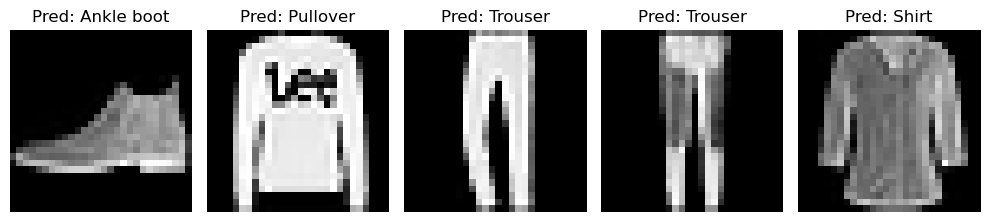

In [12]:
# Step b: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step b: Display sample predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(model.predict(x_test[i:i+1]))]}")
    plt.axis('off')
plt.tight_layout()
plt.show()